# kNN Model

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler

In [3]:
data = pd.read_csv('datasets/magic04.data', 
                   names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class'])

data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
data['class'] = (data['class'] == 'g').astype(int)
data['class'].unique()

array([1, 0])

##### Data split

In [9]:
X = data.drop('class', axis=1)
y = data['class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15216, 10) (3804, 10) (15216,) (3804,)


In [24]:
def train_model(X, y, neighbours, iter_num):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=iter_num)
    
    knn_model = KNeighborsClassifier(n_neighbors=neighbours)
    knn_model.fit(X_train, y_train)
    
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

##### Hyperparameter tuning

In [28]:
accuracy = -1

for k in range(1, 15, 2):
    for i in range(0, 1000):
        best_acc = train_model(X=X, y=y, neighbours=k, iter_num=i)
        
        if best_acc > accuracy:
            accuracy = best_acc
            print(f'Accuracy {round(accuracy, 7)} K {k} RandomState {i}')
            
        if i%100 == 0:
            print(f'--------------------------------------------------------------------------------------> IterNum {i}')

Accuracy 0.7747108 K 1 RandomState 0
--------------------------------------------------------------------------------------> IterNum 0
Accuracy 0.7812829 K 1 RandomState 2
Accuracy 0.7849632 K 1 RandomState 3
Accuracy 0.7889064 K 1 RandomState 4
Accuracy 0.7928496 K 1 RandomState 21
Accuracy 0.7944269 K 1 RandomState 56
Accuracy 0.7973186 K 1 RandomState 71
--------------------------------------------------------------------------------------> IterNum 100
--------------------------------------------------------------------------------------> IterNum 200
--------------------------------------------------------------------------------------> IterNum 300
--------------------------------------------------------------------------------------> IterNum 400
--------------------------------------------------------------------------------------> IterNum 500
--------------------------------------------------------------------------------------> IterNum 600
Accuracy 0.8009989 K 1 RandomState 640
-

##### Cross Validation

In [31]:
k_values = list(range(1, 31))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation
    accuracy_scores.append(np.mean(scores))

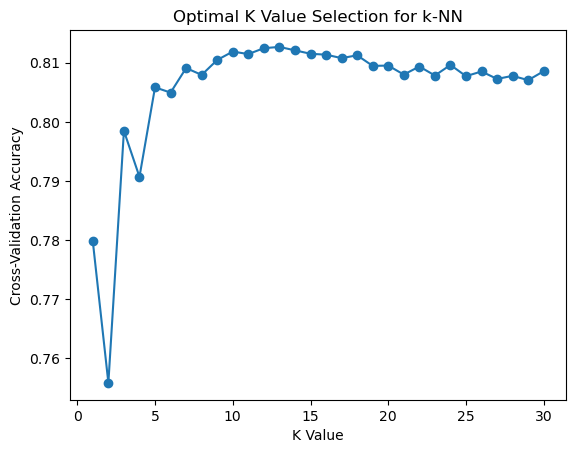

In [34]:
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Optimal K Value Selection for k-NN')
plt.show()

In [35]:
optimal_k = k_values[np.argmax(accuracy_scores)]
print("Optimal K value:", optimal_k)

Optimal K value: 13


##### Iterating more for K = 13 for better accuracy

In [ ]:
accuracy = -1

for i in range(182, 10_000):
    best_acc = train_model(X=X, y=y, neighbours=13, iter_num=i)

    if best_acc > accuracy:
        accuracy = best_acc
        print(f'Accuracy {round(accuracy, 7)} K {k} RandomState {i}')

    if i%500 == 0:
        print(f'--------------------------------------------------------------------------------------> IterNum {i}')

Accuracy 0.8283386 K 30 RandomState 182
